In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator as op

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,7)})

import warnings
warnings.filterwarnings("ignore")

In [207]:
# Load dataset
cols = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv('movie_rating/u.data', sep='\t')
data.columns = cols

In [208]:
cols_m = ['movie_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown',
          'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Fantasy', 'Film-Noir', 'Horror', 'Musical' ,'Mystery' ,'Romance' ,'Sci-Fi', 'Thriller',
          'War', 'Western']
movies = pd.read_csv('movie_rating/u.item', sep = '|', encoding='latin-1')

movies.columns = cols_m

In [209]:
cols_u = ['user_id','age', 'gender', 'occupation', 'zip code']
users = pd.read_csv('movie_rating/u.user', sep = '|')
users.columns = cols_u

### Merge data, movie and user 

In [210]:
df = pd.merge(data, movies, on=['movie_id'])
df = pd.merge(df,users, on=['user_id'])

In [211]:
df.shape

(99276, 31)

In [212]:
print(df['video release date'].isnull().sum())

99276


In [213]:
# Deleting columns which are not useful for analysis : ['video release date', 'zip code', 'IMDB URL']
df.drop(columns=['video release date', 'zip code', 'IMDb URL', 'unknown'], inplace=True)

In [214]:
df.head().T

,0,1,2,3,4
user_id,186,186,186,186,186
movie_id,302,257,1042,118,546
rating,3,4,5,2,4
timestamp,891717742,891719774,879023632,879023242,891719775
movie title,L.A. Confidential (1997),Men in Black (1997),Just Cause (1995),Twister (1996),Broken Arrow (1996)
release date,01-Jan-1997,04-Jul-1997,01-Jan-1995,10-May-1996,09-Feb-1996
Action,0,1,0,1,1
Adventure,0,1,0,1,0
Animation,0,0,0,0,0
Children,0,0,0,0,0


## Exploratory Data Analysis on Movielens dataset

### Analysis of number of ratings by user ID

- Fig 1 : It shows that most ratings are from a handful of users.
- Fig 2 : It shows that 60% of users have given 100 or less ratings. Only 2% have given 400 or above ratings. 
- Fig 3 : Boxplot shows that 50% of users have given 70 or less number of ratings. 

Text(0.5, 1.0, 'Fig 1 : Number of ratings by User ID')

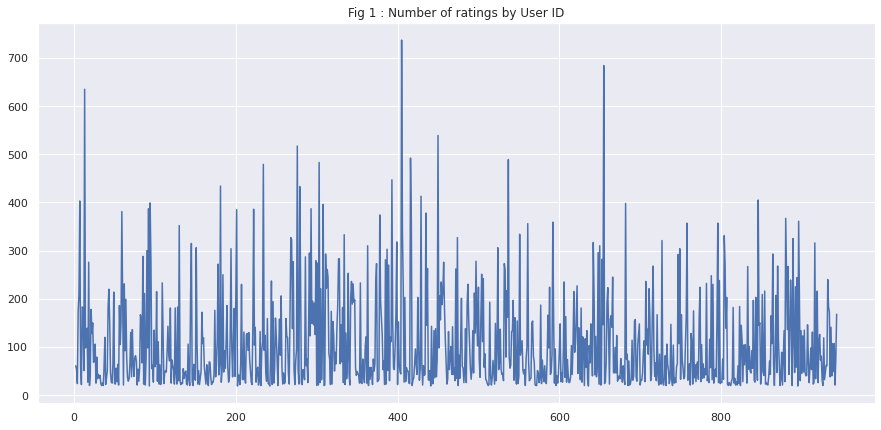

In [237]:
plt.plot(df.groupby(['user_id']).size())
plt.title("Fig 1 : Number of ratings by User ID")

Text(0.5, 1.0, 'fig 2 : Cumulative distribution of #ratings per user ID')

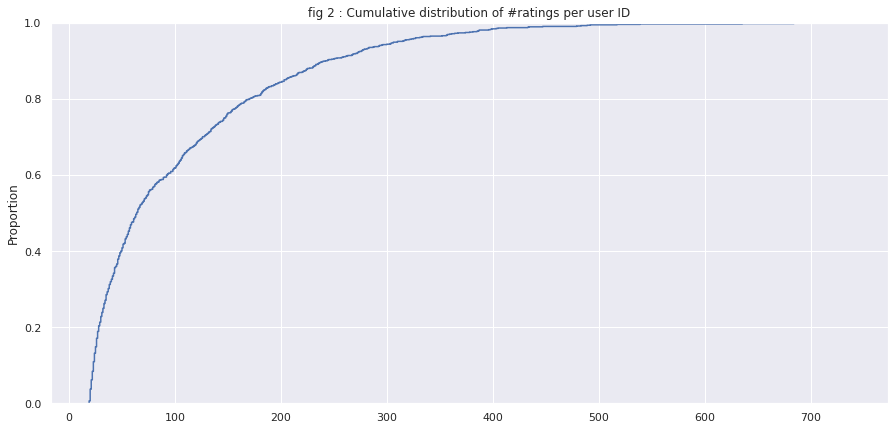

In [238]:
sns.ecdfplot(df.groupby(['user_id']).size()).set_title('fig 2 : Cumulative distribution of #ratings per user ID')

Text(0.5, 1.0, 'Fig 3 : Boxplot of #ratings per user ID')

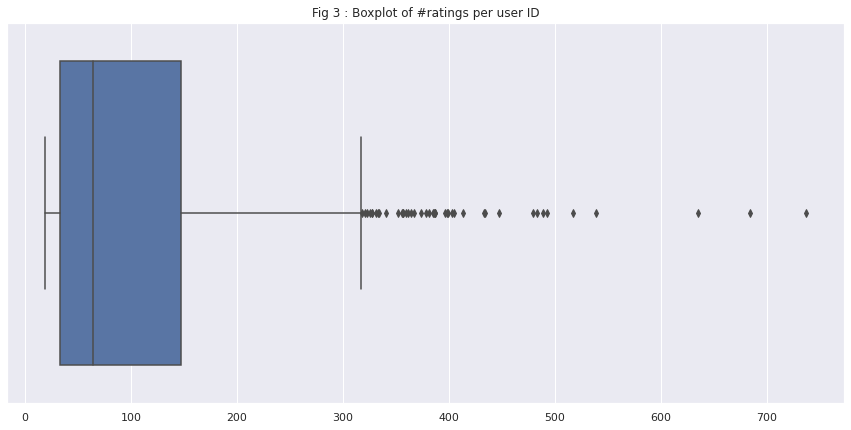

In [241]:
sns.boxplot(df.groupby(['user_id']).size()).set_title('Fig 3 : Boxplot of #ratings per user ID')

### Analysis of average rating by user ID

- Fig 4 : It shows that very few ratings are below 2.5 and above 4.5. Most ratings lie around 3.5 and 4.
- Fig 5 : 40% users have given rating 3.5 or less. Only 1% have given rating 4.5% or above. 83% users have given rating 4 or less. 2% have given rating 2.5 or less.


Text(0.5, 1.0, 'Fig 4 : Mean rating by User ID')

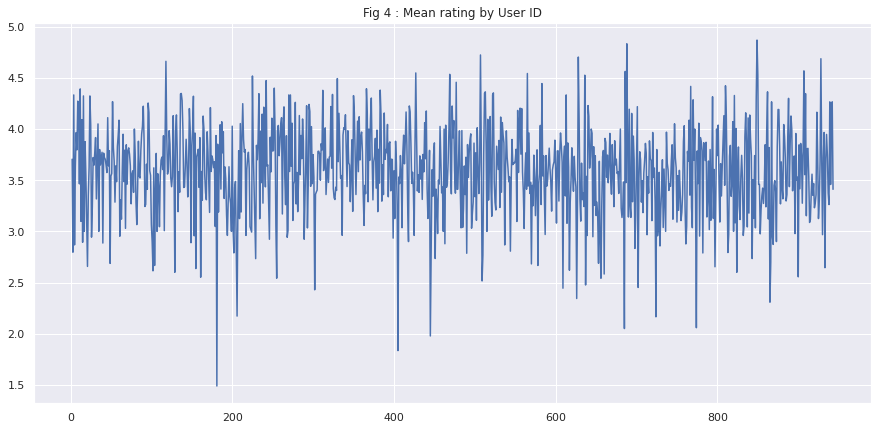

In [244]:
plt.plot(df[['user_id', 'rating']].groupby(['user_id']).mean())
plt.title("Fig 4 : Mean rating by User ID")

Text(0.5, 1.0, 'Fig 5 : Cumulative distribution of avg rating per user ID')

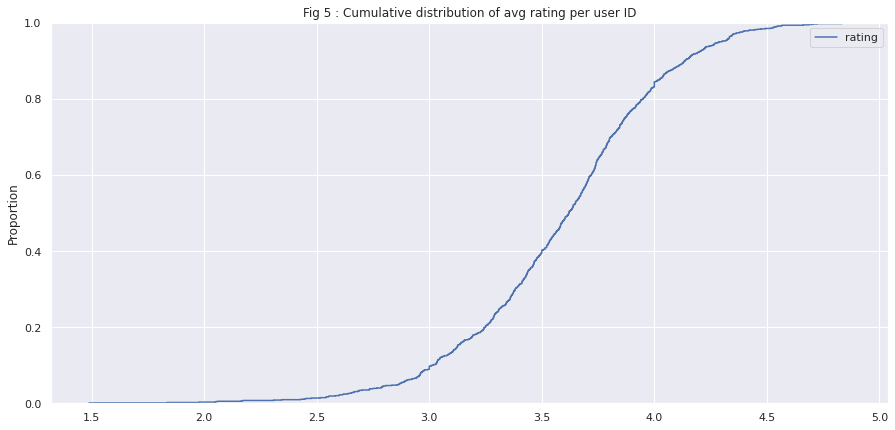

In [245]:
sns.ecdfplot(df[['user_id', 'rating']].groupby(['user_id']).mean()).set_title('Fig 5 : Cumulative distribution of avg rating per user ID')

### Analysis of ratings across movies

- Fig 6 : It shows that 80% of movies have been given 100 or less number of ratings. Only 2-3% movies have been given 300 or more ratings.
- Fig 7 : Average rating 40% movies is 3 or below. Average rating of only 10% movies is 4 or above. Average rating of only 10% movies is 2 or below.

Text(0.5, 1.0, 'Fig 6 : Cumulative distribution of #ratings per movie ID')

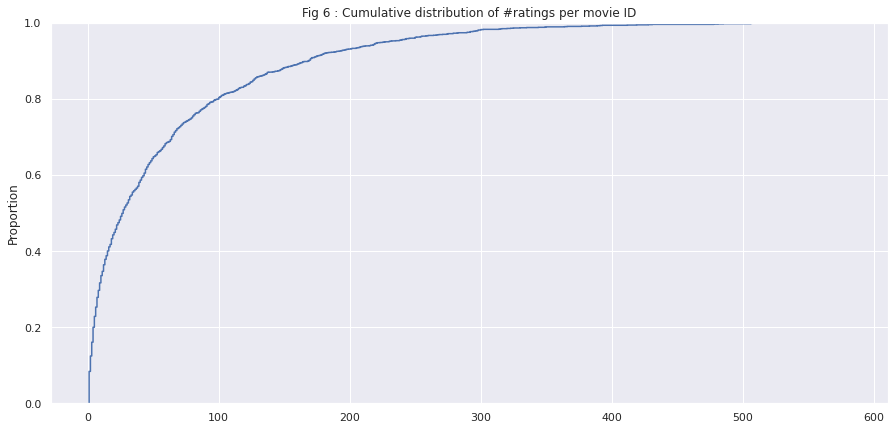

In [246]:
sns.ecdfplot(df.groupby(['movie_id']).size()).set_title('Fig 6 : Cumulative distribution of #ratings per movie ID')

Text(0.5, 1.0, 'Fig 7 : Cumulative distribution of avg rating per movie ID')

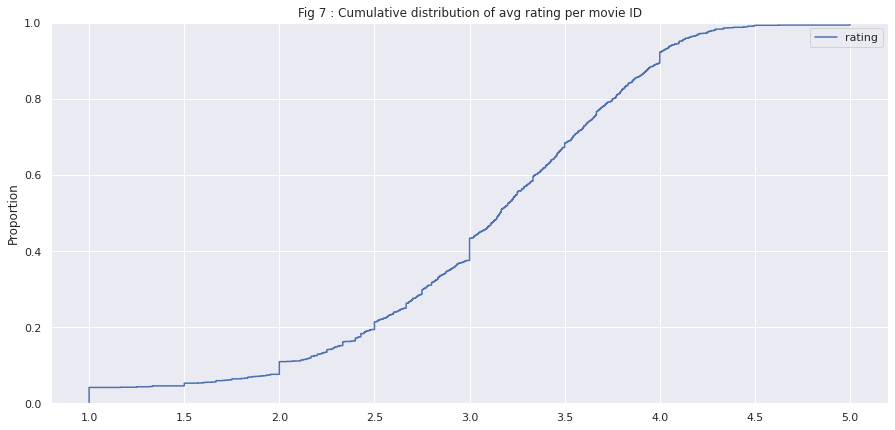

In [247]:
sns.ecdfplot(df[['movie_id', 'rating']].groupby(['movie_id']).mean()).set_title('Fig 7 : Cumulative distribution of avg rating per movie ID')

### Analysis by genre

- Interpretation : Best genres according to ratings : war, file-noir, documentary, drama. Genres with bad ratings are horror, children and comedy and fantasy.

In [222]:
genres = df.columns.tolist()[6: -3]


In [248]:
ratings_genres = {}
for genre in genres: 
    df_this = df.loc[df[genre] == 1]
    this_list = df_this.rating.tolist()
    ratings_genres[genre] = this_list
        

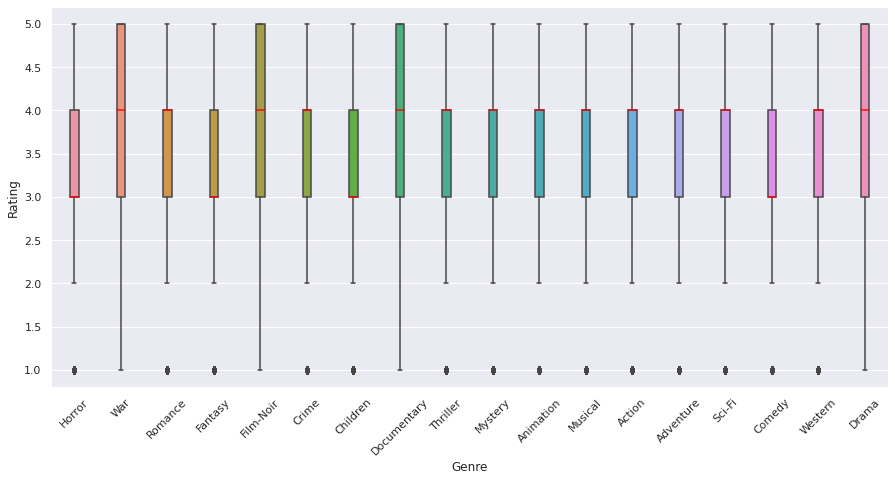

In [235]:
# sort keys and values together
sorted_keys, sorted_vals = zip(*sorted(ratings_genres.items(), key=op.itemgetter(1)))

# almost verbatim from question
sns.set(context='notebook')

plot = sns.boxplot(data=sorted_vals, 
                   width=0.18,
                   medianprops=dict(color="red", alpha=0.9),).set(xlabel='Fig :8 Genre', ylabel='Rating')
plt.xticks(plt.xticks()[0], sorted_keys, rotation=45)

plt.show()

In [249]:
age_genres = {}
for genre in genres: 
    
    df_this = df.loc[df[genre] == 1]
    this_list = df_this.age.tolist()
    age_genres[genre] = this_list

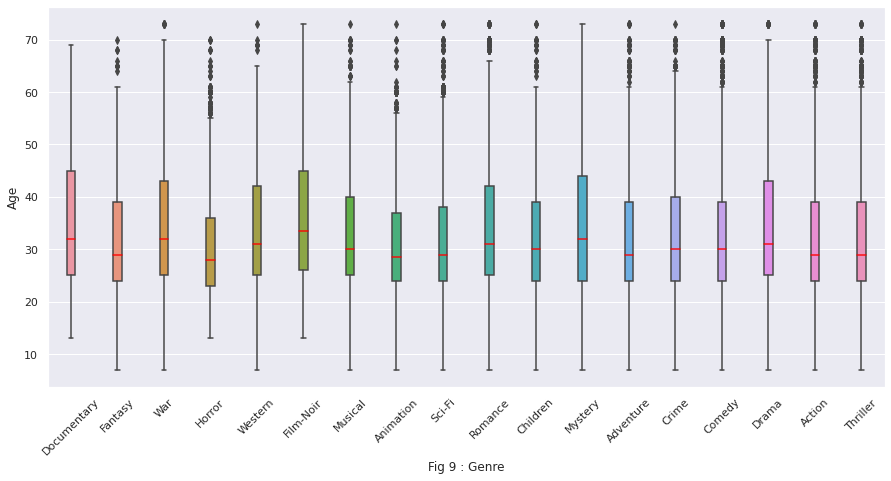

In [250]:
# sort keys and values together
sorted_keys, sorted_vals = zip(*sorted(age_genres.items(), key=op.itemgetter(1)))

# almost verbatim from question
sns.set(context='notebook')

plot = sns.boxplot(data=sorted_vals, 
                   width=0.18,
                   medianprops=dict(color="red", alpha=0.9),).set(xlabel='Fig 9 : Genre', ylabel='Age')
plt.xticks(plt.xticks()[0], sorted_keys, rotation=45)

plt.show()

There is no significant difference in interests among different age groups. People between age mid 20s to 40 watch every genre. People with age above 40 watch genres like Documentary, War, Western, Film_noir, Romance, Mystery and drama.